**Working plan**

The purpose of the project - Develop a model that can give an estimate of the number of customers of the Telecom company and locate customers who have the potential to leave.

Now we will perform a preliminary data analysis so that we can build the work plan.

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

In [92]:
internet_data = pd.read_csv('/datasets/final_provider/internet.csv')

In [93]:
internet_data.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [94]:
contract_data = pd.read_csv('/datasets/final_provider/contract.csv')

In [95]:
contract_data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [96]:
personal_data = pd.read_csv('/datasets/final_provider/personal.csv')

In [97]:
personal_data .head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [98]:
phone_data = pd.read_csv('/datasets/final_provider/phone.csv')

In [99]:
phone_data.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [100]:
# We will unite all our data sets based on the ID column.
data = pd.merge(personal_data, internet_data, how='left', on='customerID')

In [101]:
data = pd.merge(data, contract_data, how='left', on='customerID')

In [102]:
data = pd.merge(data, phone_data, how='left', on='customerID')

In [103]:
# We will make our column letters lowercase.
data.columns= data.columns.str.lower()

In [104]:
data.head()

,customerid,gender,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,multiplelines
0,7590-VHVEG,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN
1,5575-GNVDE,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No
3,7795-CFOCW,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN
4,9237-HQITU,Female,0,No,No,Fiber optic,No,No,No,No,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No


In [105]:
data.duplicated().sum()

0

In [106]:
data.isnull().sum()/len(data)

customerid          0.000000
gender              0.000000
seniorcitizen       0.000000
partner             0.000000
dependents          0.000000
internetservice     0.216669
onlinesecurity      0.216669
onlinebackup        0.216669
deviceprotection    0.216669
techsupport         0.216669
streamingtv         0.216669
streamingmovies     0.216669
begindate           0.000000
enddate             0.000000
type                0.000000
paperlessbilling    0.000000
paymentmethod       0.000000
monthlycharges      0.000000
totalcharges        0.000000
multiplelines       0.096834
dtype: float64

We can see that 21 percent of our users do not consume internet services so there are missing values ​​in these columns, also 9 percent of our customers do not consume telephone services. Therefore, we will fill in the missing values ​​in the "not consume" value and see if this has an effect on the customer leaving later.

In [107]:
data.fillna('not consume', inplace=True)

In [108]:
#We will cut the data set to customers who have already left to get an idea of the factors that influence their 
data_filtered = data.query('enddate != "No"') 

In [109]:
data_filtered['begindate'] =pd.to_datetime(data_filtered['begindate'])
data_filtered['enddate'] =pd.to_datetime(data_filtered['enddate'])

/tmp/ipykernel_24/1272656936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['begindate'] =pd.to_datetime(data_filtered['begindate'])
/tmp/ipykernel_24/1272656936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['enddate'] =pd.to_datetime(data_filtered['enddate'])


In [110]:
#We will create a column of the stay time of each customer who left.
data_filtered['total_time'] = data_filtered['enddate'] - data_filtered ['begindate']
data_filtered['total_time'].mean()

/tmp/ipykernel_24/2474816247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['total_time'] = data_filtered['enddate'] - data_filtered ['begindate']


Timedelta('547 days 08:26:57.977528088')

In [111]:
# print the geneal/summary information about the DataFrame
data_filtered.describe()

,seniorcitizen,monthlycharges,total_time
count,1869.000000,1869.000000,1869
mean,0.254682,74.441332,547 days 08:26:57.977528088
std,0.435799,24.666053,594 days 09:21:02.012639248
min,0.000000,18.850000,30 days 00:00:00
25%,0.000000,56.150000,61 days 00:00:00
50%,0.000000,79.650000,304 days 00:00:00
75%,1.000000,94.200000,883 days 00:00:00
max,1.000000,118.350000,2191 days 00:00:00


Now we see that the average length of stay of a customer in the company is 547 days. Now we will check the correlation between the other features to understand which of them has the most effect on the time the customer stayed.
Also the ''enddate'' column is our goal.

/tmp/ipykernel_24/1955160208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['total_time'] = pd.to_numeric(data_filtered['total_time'], downcast='float')


0.4013309349634318


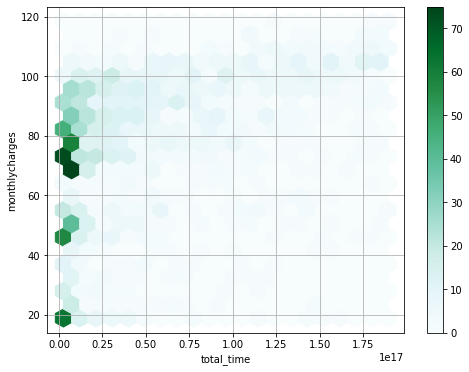

In [112]:
data_filtered['total_time'] = pd.to_numeric(data_filtered['total_time'], downcast='float')
print(data_filtered['total_time'].corr(data_filtered['monthlycharges']));
data_filtered.plot(x='total_time', y='monthlycharges', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True);

0.09144372815049022


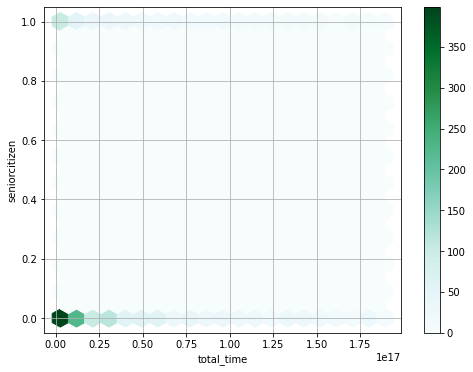

In [113]:
##We will create graphs for our pizzas, to see that they are correct.
print(data_filtered['total_time'].corr(data_filtered['seniorcitizen']));
data_filtered.plot(x='total_time', y='seniorcitizen', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True);

In [114]:
#Now our categorical features.
categoriel = ['gender', 'partner','dependents','internetservice','onlinesecurity','onlinebackup',
              'deviceprotection','techsupport','streamingtv', 'streamingmovies', 'type','paperlessbilling','paymentmethod','multiplelines']

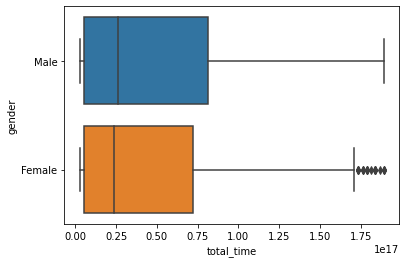

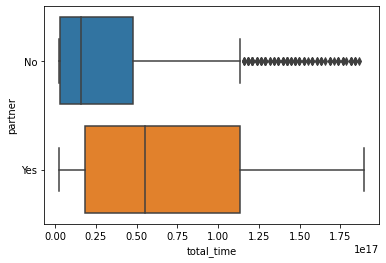

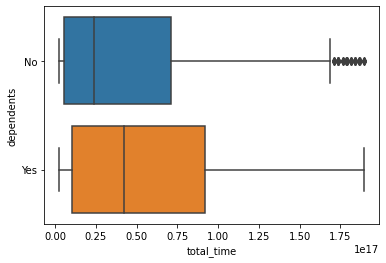

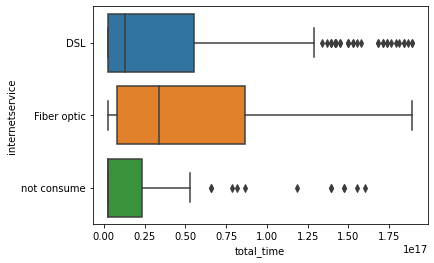

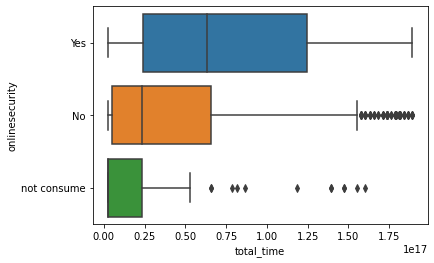

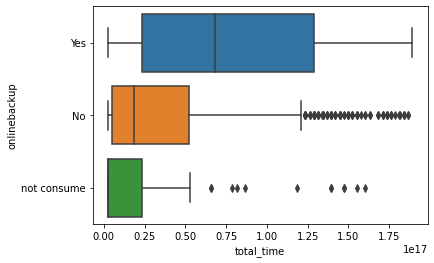

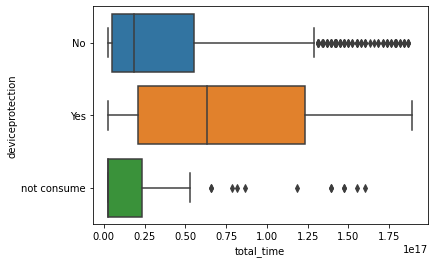

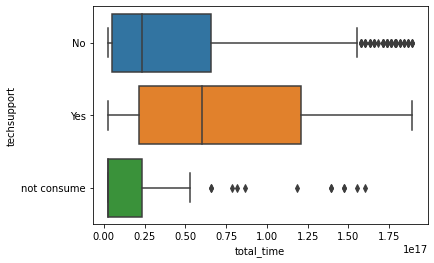

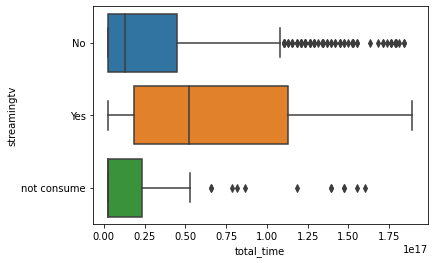

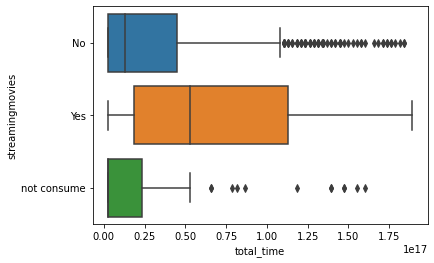

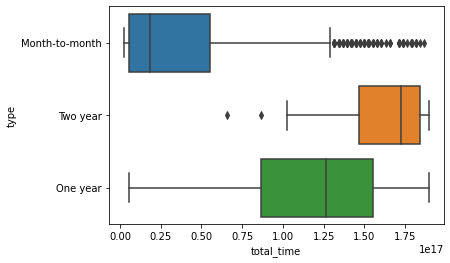

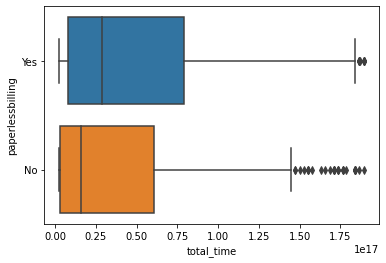

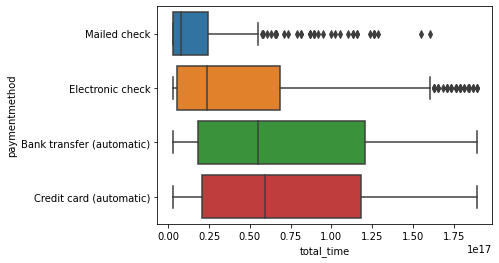

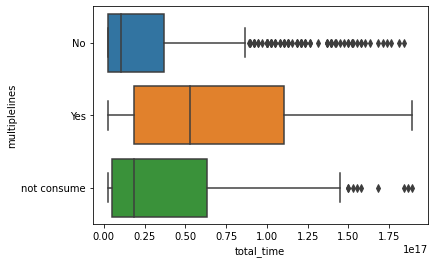

In [115]:
for i in categoriel:
    sns.boxplot(x ='total_time', y = i, data= data_filtered)
    plt.show()

**Building the model**

In [116]:
#Since this is a binary classification task, we will use a logistic regression model.
#We will start by preparing the data for machine learning.
#In the first step we will change our goal to customer who stayed = 0, customer who left = 1.
for c in data['enddate']:
    if c == "No":
        data['enddate'].replace({c: "0"}, inplace=True)       

In [117]:
for c in data['enddate']:
    if c != "0":
        data['enddate'].replace({c: "1"}, inplace=True)

In [118]:
data['enddate'].value_counts()

0    5174
1    1869
Name: enddate, dtype: int64

In [119]:
#We will get rid of all the columns that are not necessary to build the model.
data =data.drop(['paperlessbilling', 'seniorcitizen', 'gender', 'customerid', 'multiplelines'], axis=1)

In [120]:
#Now we'll encode all our non-numeric values.
#We will use the OHE method, the coding method that is most compatible with logistic regre
categorical = ['partner','dependents','internetservice','onlinesecurity','onlinebackup',
              'deviceprotection','techsupport','streamingtv', 'streamingmovies', 'type','paymentmethod', 'begindate', 'totalcharges']

In [121]:
for column in categorical:
    tempdf = pd.get_dummies(data[column], prefix=column)
    data = pd.merge(
        left=data,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    data = data.drop(columns=column)

In [122]:
# We will divide our dataset into training, evaluation and test sets.
#set aside 20% of train and test data for evaluation
df_train, df_test = train_test_split(data, test_size=0.2, random_state=12345)

# Use the same function above for the validation set
df_train, df_valid = train_test_split(data, test_size=0.25, random_state=12345) # 0.25 x 0.8 = 0.2

In [123]:
# We will define features and targets, according to the investigation we did.
features_train = df_train.drop(['enddate'], axis=1)
target_train = df_train['enddate']
features_valid = df_valid.drop(['enddate'], axis=1)
target_valid = df_valid['enddate']
features_test = df_test.drop(['enddate'], axis=1)
target_test = df_test['enddate']

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


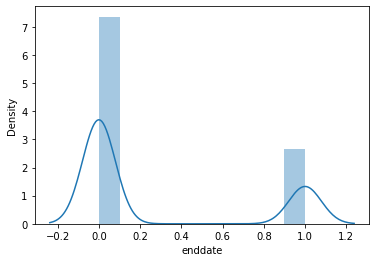

In [124]:
#We will check the balance of the classes in our goal.
sns.distplot(target_train, bins=10);

We can see that the classification is not balanced, to fix this we will change the parameter class_weight='balanced' in the models we will test.

**Testing models**

In [125]:
#We will perform a sanity check for the model.
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_train, target_train)

predicted_valid_dummy = dummy_clf.predict(features_valid)
print('Accuracy score:',accuracy_score(target_valid, predicted_valid_dummy))

probabilities_valid_d = dummy_clf.predict_proba(features_valid)
probabilities_one_valid_d = probabilities_valid_d[:, 1]
print('roc_auc_score:',roc_auc_score(target_valid, probabilities_one_valid_d))

Accuracy score: 0.7308347529812607
roc_auc_score: 0.5


In [126]:
# Now we will test the logistic regression model.
#The measure we are looking for is AUC-ROC, but we will also use the accuracy measure for further impression.ance.
model = LogisticRegression(random_state=12345,
                           solver='liblinear',  class_weight='balanced')
model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)
print('F1 score:',f1_score(target_valid, predicted_valid, pos_label='0'))

F1 score: 0.8363636363636362


In [127]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

roc_auc_score(target_valid, probabilities_one_valid)

0.8565564768096414

In [128]:
# Now we will check the decision tree and compare the results of the models.
for depth in range(1, 6):
    model_1 = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')

    model_1.fit(features_train, target_train)

    predictions_valid_1 = model_1.predict(features_valid)

    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid_1))

max_depth = 1 : 0.6547416240772288
max_depth = 2 : 0.730266893810335
max_depth = 3 : 0.7495741056218058
max_depth = 4 : 0.7285633162975582
max_depth = 5 : 0.7461669505962522


In [129]:
probabilities_valid_1 = model_1.predict_proba(features_valid)
probabilities_one_valid_1 = probabilities_valid_1[:, 1]
roc_auc_score(target_valid, probabilities_one_valid_1)

0.8199595762886902

After examining the decision tree at a depth of 6, it can be clearly seen that the logistic regression model gave better results in both parameters.

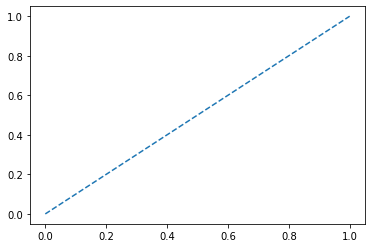

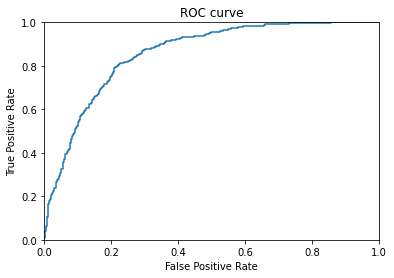

In [130]:
#Now we give a visual illustration of our model.
#The first graph shows a random model, and the second graph the results of our model.
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid, pos_label='1')

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

Our AUC-ROC score is 0.85, this is an excellent score for this measure.
You can also see in the graph we created that most of our answers are true
positive.
Also, he far exceeded our model of sanity.

In [131]:
#In the last step we will test the model on the test set, and a visual illustration will be given.
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
roc_auc_score(target_test, probabilities_one_test)

0.8634270051489612

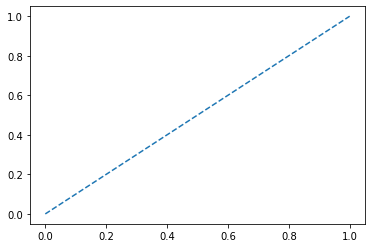

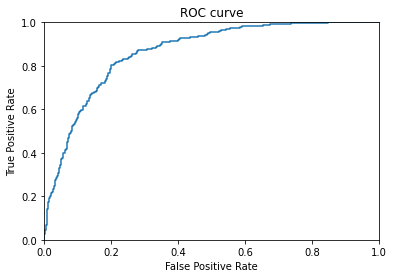

In [132]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test, pos_label='1')

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

Even in the final test on the test set, our model passed well.

Conclusion - the model works and is ready for work.

**Solution Report:**

**My work plan:**  
*1.Downloading the data*   
*2.Preparing the data* - dealing with duplicates, dealing with problems in the data set, dealing with exceptions.   
*3.Preliminary analysis* preparing a main data set, creating graphs and find the features ('begindate','monthlycharges','paymentmethod', 'type', 'streamingmovies','streamingtv','internetservice', 'partner' ) and target(enddate), locating and deleting exceptions, coding categorical values.   
*4.The model* - Since this is a classification task, I will examine the logistic regression and decision tree models in different depths.
I will test the model with the accuracy and AUC-ROC indicators.

**Steps from the work plan carried out:**

1.Downloading the data  
2.Preparing the data - dealing with duplicates, Merging the 4 tables into one central table, finding exceptions.   
3.Preliminary analysis- preparing a main data set, creating graphs and find the features ('begindate','monthlycharges','paymentmethod', 'type', 'streamingmovies','streamingtv','internetservice', 'partner' ) and target(enddate), coding categorical values.  
4.Building the model - we created two models, a logistic regression and a decision tree. We compared the two indices and found that logistic regression is more suitable for this task.
We also created a dummy model to do a sanity check.

**Skipped steps:**

The only step that is skipped from the work program is the deletion of abnormal values.
Although such were found, they were all categorical values, which by virtue of being such are not really exceptional.

**Difficulties during work:**

I had two difficulties during the work:  
1. Decide what I do with the outliers. After investigation I came to the conclusion that categorical values ​​are usually not unusual.
2. Creating an AUC-ROC curve. I worked with the model we learned but it didn't work for me. I researched the matter and realized that when working with a binary target, a parameter called 'pos_label' must be added.

**Key steps in solving the problem:**

1. Understanding the task and deciding on what type of solution should be given.
2. Understanding the data set and turning it into one set that can be manipulated and is easy to work with.
3. Filtering the appropriate information from the array.
4. Testing different models for solving the type of problem we defined and choosing the most appropriate one among them.
5. Final check on the test setup and decision whether the model is indeed successful.

**The final model - logistic regression.**

The final grades-